# Title: Which was popular candidate, Biden or Trump?

# Introduction

In this report, I am going to examine the result of US presidential election 2020 
by using the dataset fromhttps://www.kaggle.com/unanimad/us-election-2020.
While Joe Biden successfully got elected as the new president, the details of the election are still uncertain.
Was Biden more popular among the whole US voters than Trump?


# Summary Statistics


## 1: Data cleaning

In this section, I will show how I clean the dataset to make it easier to analysise the data in the next section.

In [308]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt 
%matplotlib inline
import requests

In [309]:
#First, let's open and read the data of US election2020.

path_to_data = "/Users/shotokuoka/Desktop/GitHub/ECO225-assignment1/president_county_candidate.csv"
df = pd.read_csv(path_to_data)
df

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [310]:
df.columns

Index(['state', 'county', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [311]:
#In order to see the number of votes each canditate recieved,
#firstly, let's change the order of the columns,
#starting from candidate name

df = df[["candidate", "party", "state", "county", "total_votes", "won"]]
df

#Next, let's erase all the unrelevant columns and make the data symple.

df = df[["candidate", "total_votes", ]]
df


,candidate,total_votes
0,Joe Biden,44552
1,Donald Trump,41009
2,Jo Jorgensen,1044
3,Howie Hawkins,420
4,Joe Biden,195034
...,...,...
32172,Write-ins,1331
32173,Donald Trump,78535
32174,Joe Biden,24831
32175,Jo Jorgensen,1302


In [312]:
#At the moment, the data shows the number of votes each candidate recieved  by EACH COUNTY.
#To see the total votes across the states, we need to change the row 

#Next, let's erase all the unrelevant columns and make the data symple.

aggregate_function = {'total_votes' : 'sum'}
df = df.groupby(by = 'candidate').aggregate(aggregate_function)

#To change the order of the row
df = df.sort_values(by= 'total_votes', ascending=False) 
df

,total_votes
candidate,
Joe Biden,82046434
Donald Trump,74585705
Jo Jorgensen,1874183
Howie Hawkins,404835
Write-ins,254274
Rocky De La Fuente,88158
Gloria La Riva,85453
Kanye West,66367
Don Blankenship,59924


## Key findings
As you can see from the above table, the majority votes went to either Joe Biden or Donald trump.
Because of this , for this report, I am going to focus on those two candidates.

Now, I am going to evaluate the popularity of those two candidates both mathemathically and visually.

### 1: Vote rate

In [298]:
print(df.loc[['Joe Biden', 'Donald Trump']])

              total_votes
candidate                
Joe Biden        82046434
Donald Trump     74585705


As you can see from the table above, 
Across the whole states,
Joe Biden recieved 82046434 votes and Donald Trump recieved 74585705 votes.


In [301]:
# Now, let's see the vote rate for Biden and Trump.
# First, we need to find the total number of votes
total_votes = 'total_votes'
sum_total_votes = df[total_votes].sum()
print(sum_total_votes)

159608237


In [279]:
#Finally, let's calculate the vote rate for Biden and Trump! 

#For Biden
print((82046434/sum_total_votes)*100)

#For Trump
print((74585705/sum_total_votes)*100)


51.404887079856664
46.73048609640366


As you can see,
The vote rate for Joe Biden is 51.4% and for Donald Trump is 46.7%.

### 2: Visualisation of the election result

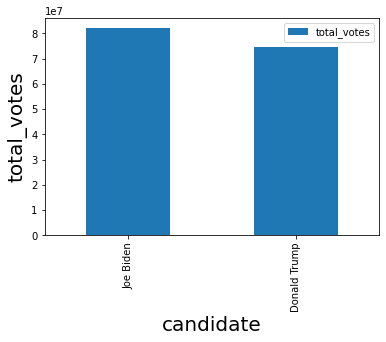

In [305]:
ax = df.loc[['Joe Biden', 'Donald Trump']].plot(kind='bar')
ax.set_xlabel('candidate', fontsize=20)
ax.set_ylabel('total_votes', fontsize=20) 
plt.show()

# Summary/Colclusion of the data anaysis

From the key findings above, I found that

- the vast majority of the United States population voted to either Joe Biden or Donald Trump.
- although Joe Biden recieved the highest votes, the difference in terms of the total votes between Joe Biden and Donald Trump is small, as 51.4% for Joe Biden and 46.7% for Donald Trump respectively.

# Future Steps

From the result of data analysis in the past section, 
there are some fields that requires further research in order to fully examine the election result.

Firstly, it is necessary to compare the data with the past elections in order to find any correlations between 2020 and past years. 
Is it a common thing that democrats candidate and republican candidate unfold "dead heat" in presidential election?
Secondly, further examination to the details are needed. 
Are there voting trends particularly in certain group of people, such as gender, states, city or countryside ?
